In [2]:
import pandas as pd


In [3]:
cd


C:\Users\Aditi Bajpai


In [4]:
df_issues = pd.read_csv("Downloads/archive (1)/issues.csv")

C:\Users\Aditi Bajpai\AppData\Local\Temp\ipykernel_21996\1072327915.py:1: DtypeWarning: Columns (17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_issues = pd.read_csv("Downloads/archive (1)/issues.csv")


In [5]:
df_links = pd.read_csv('Downloads/archive (1)/issuelinks.csv')

In [6]:
df_comments = pd.read_csv('Downloads/archive (1)/comments.csv')

In [7]:
df_changelogs = pd.read_csv('Downloads/archive (1)/changelog.csv')

In [8]:
df_issues = pd.read_csv("Downloads/archive (1)/issues.csv", low_memory=False)

In [9]:
print(df_issues.columns.tolist())
df_issues.info()


['id', 'key', 'summary', 'resolution.id', 'resolution.description', 'resolution.name', 'priority.id', 'priority.name', 'labels', 'assignee', 'status.id', 'status.description', 'status.name', 'statusCategory.id', 'statusCategory.key', 'statusCategory.colorName', 'statusCategory.name', 'customfield_12310921', 'creator', 'subtasks', 'reporter', 'votes.votes', 'issuetype.id', 'issuetype.description', 'issuetype.name', 'issuetype.subtask', 'project.id', 'project.key', 'project.name', 'projectCategory.id', 'projectCategory.description', 'projectCategory.name', 'resolutiondate', 'watches.watchCount', 'created', 'updated', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149323 entries, 0 to 1149322
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   id                           1131224 non-null  float64
 1   key                          1149323 non-null  object 
 2   summ

In [10]:
# Convert 'created' and 'resolutiondate' to datetime
df_issues['created'] = pd.to_datetime(df_issues['created'], errors='coerce')
df_issues['resolutiondate'] = pd.to_datetime(df_issues['resolutiondate'], errors='coerce')

# Drop rows where either date is missing
df_clean = df_issues.dropna(subset=['created', 'resolutiondate'])

# Calculate resolution time in days
df_clean['resolution_time_days'] = (df_clean['resolutiondate'] - df_clean['created']).dt.total_seconds() / 86400

# Preview cleaned data
df_clean[['key', 'assignee', 'issuetype.name', 'priority.name', 'status.name', 'resolution_time_days']].head()


C:\Users\Aditi Bajpai\AppData\Local\Temp\ipykernel_21996\1354461935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['resolution_time_days'] = (df_clean['resolutiondate'] - df_clean['created']).dt.total_seconds() / 86400


,key,assignee,issuetype.name,priority.name,status.name,resolution_time_days
0,WW-712,632ec9dd,Improvement,Minor,Closed,0.002037
1,XALANC-446,NaN,Bug,Blocker,Resolved,4.277847
2,ROL-587,4d4054ac,Bug,Critical,Closed,1.061273
5,DIRNAMING-9,b6154a7a,Improvement,Major,Closed,7.366100
6,GROOVY-686,32a9e33f,Bug,Major,Closed,5.693461


In [12]:
# Number of issues assigned to each team member
assignee_counts = df_clean['assignee'].value_counts().head() # Top 10
print(assignee_counts)

assignee
06893fff    14916
1595b58c    14539
469b79e7     7377
6bf90161     6552
1b3cf819     2722
Name: count, dtype: int64


In [13]:
# Average resolution time by assignee (top 10)
avg_resolution_by_assignee = df_clean.groupby('assignee')['resolution_time_days'].mean().sort_values(ascending=False).head(10)
print(avg_resolution_by_assignee)

assignee
6023bebd    7786.532141
bcf38b64    7383.380191
b3d39ee1    5869.194873
11e7e8ba    4541.546435
1a2682d0    4497.971262
28a48712    4410.684705
a3e59c3d    4387.130475
515edf33    4186.924514
aa7132a6    4040.308796
bcd6b200    3927.290413
Name: resolution_time_days, dtype: float64


In [14]:
# Count of issues by final status
status_counts = df_clean['status.name'].value_counts()
print(status_counts)

status.name
Closed             509886
Resolved           432749
Done                 2486
Triage Needed         679
Reopened              331
Open                  149
Patch Available       136
To Do                   5
Accepted                2
In Progress             2
Idea                    1
Name: count, dtype: int64


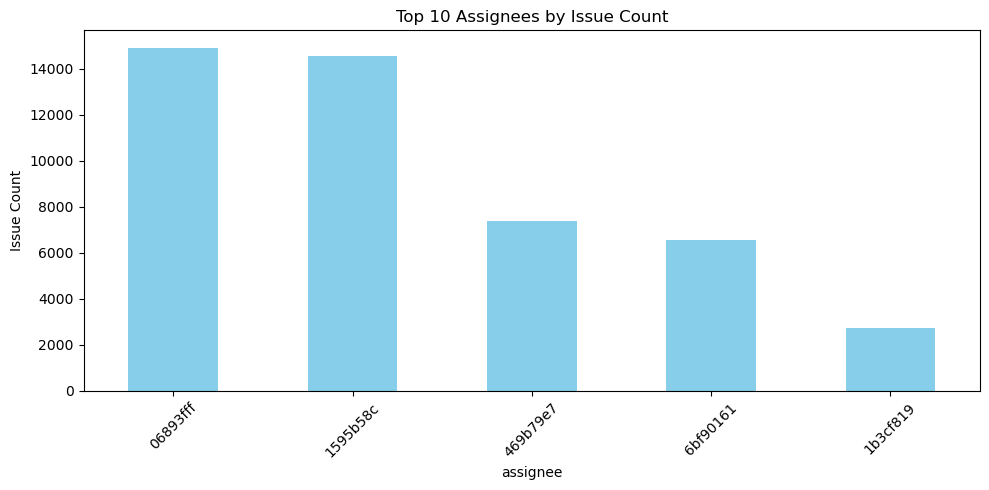

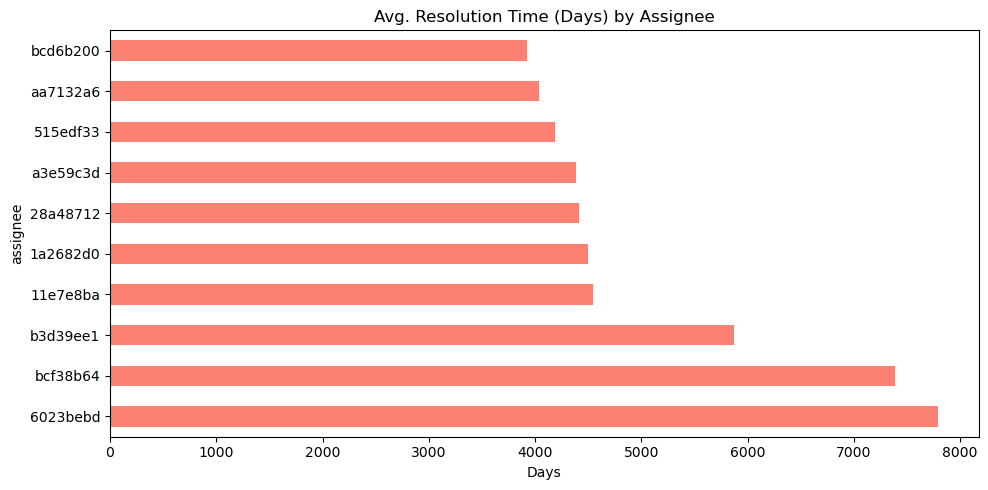

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Team workload bar plot
plt.figure(figsize=(10, 5))
assignee_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Assignees by Issue Count')
plt.ylabel('Issue Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Avg resolution time bar plot
plt.figure(figsize=(10, 5))
avg_resolution_by_assignee.plot(kind='barh', color='salmon')
plt.title('Avg. Resolution Time (Days) by Assignee')
plt.xlabel('Days')
plt.tight_layout()
plt.show()


In [17]:
# Chart 1: Top 10 Assignees by Issue Count
#The first two assignees (06893fff, 1595158c) have handled ~15,000+ issues each, which is significantly higher than others.

#Insight: These team members might be overloaded — a sign to rebalance workloads.

#⏱️ Chart 2: Avg. Resolution Time by Assignee
#Some team members (e.g., 6023bebd, bcf38b64) take 7000–8000 days on average — which looks unrealistic.

#🔎 Likely reason: Some tickets may have created dates that are very old or missing resolution date logic.



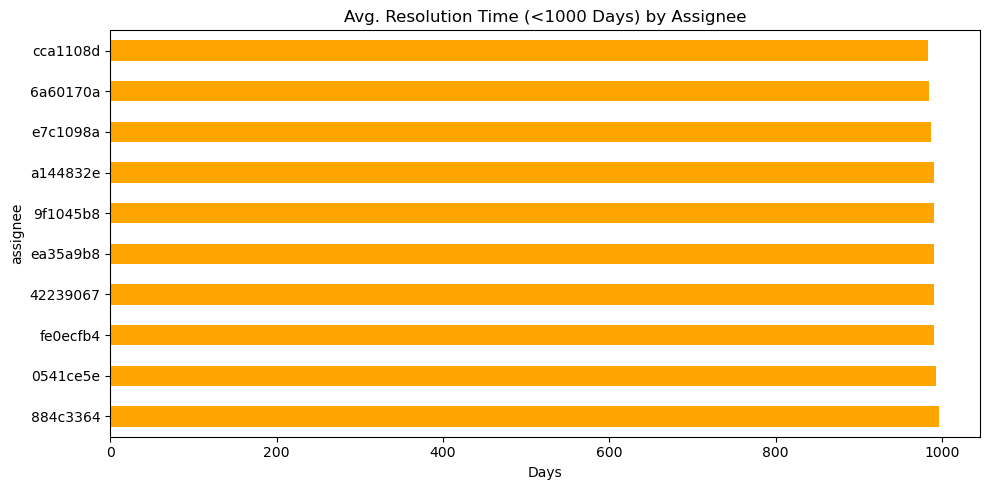

In [19]:
# Filter out issues taking more than 1000 days (≈3 years)
df_filtered = df_clean[df_clean['resolution_time_days'] <= 1000]

# Recalculate average resolution time per assignee (with outlier removed)
filtered_avg = df_filtered.groupby('assignee')['resolution_time_days'].mean().sort_values(ascending=False).head(10)

# Plot again
filtered_avg.plot(kind='barh', color='orange', figsize=(10,5), title='Avg. Resolution Time (<1000 Days) by Assignee')
plt.xlabel('Days')
plt.tight_layout()
plt.show()


C:\Users\Aditi Bajpai\AppData\Local\Temp\ipykernel_21996\588687438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['resolved_month'] = df_clean['resolutiondate'].dt.to_period('M')


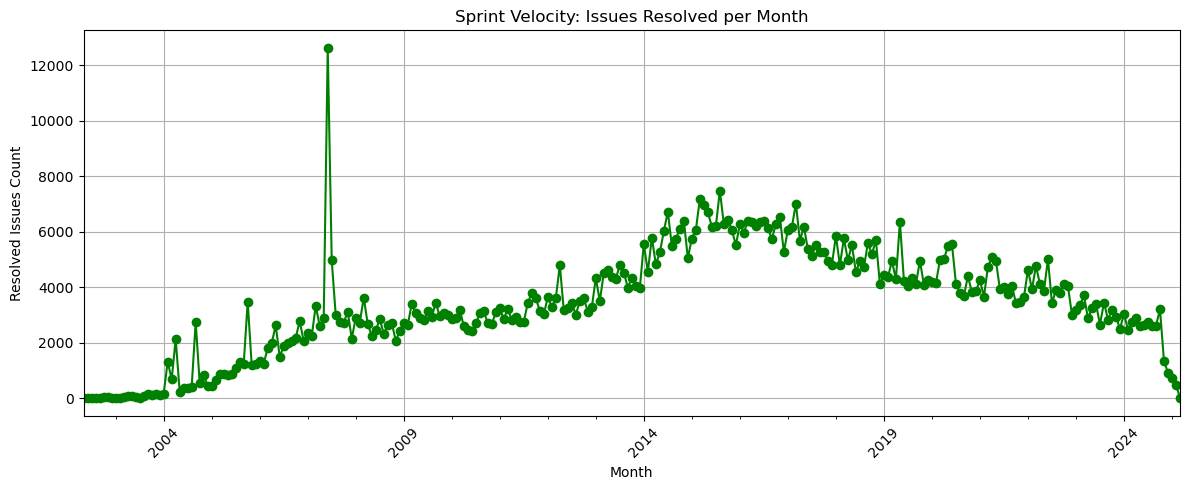

In [20]:
# Create a 'month' column based on resolution date
df_clean['resolved_month'] = df_clean['resolutiondate'].dt.to_period('M')

# Count of issues resolved each month
monthly_resolved = df_clean['resolved_month'].value_counts().sort_index()

# Plot
monthly_resolved.plot(kind='line', figsize=(12, 5), marker='o', color='green')
plt.title('Sprint Velocity: Issues Resolved per Month')
plt.ylabel('Resolved Issues Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


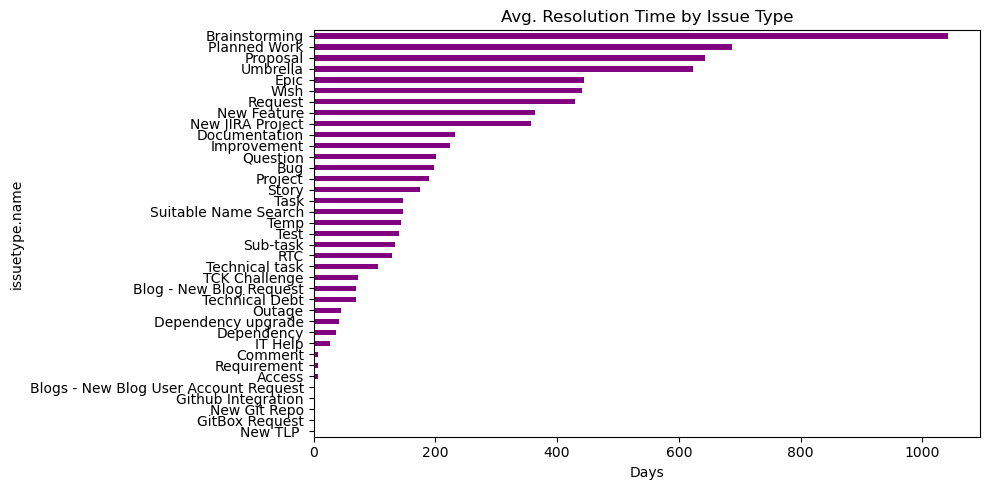

In [21]:
issue_type_resolution = df_clean.groupby('issuetype.name')['resolution_time_days'].mean().sort_values()

# Plot
issue_type_resolution.plot(kind='barh', figsize=(10, 5), color='purple')
plt.title('Avg. Resolution Time by Issue Type')
plt.xlabel('Days')
plt.tight_layout()
plt.show()


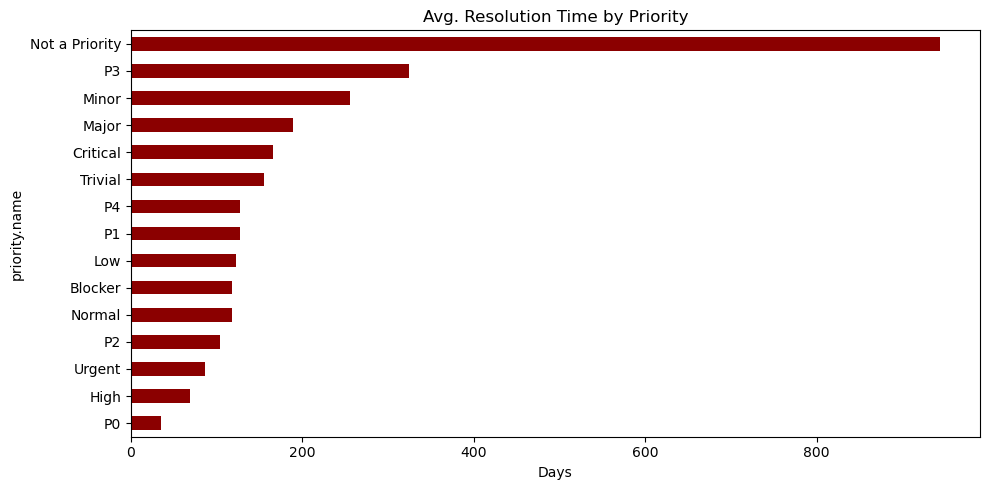

In [22]:
priority_resolution = df_clean.groupby('priority.name')['resolution_time_days'].mean().sort_values()

# Plot
priority_resolution.plot(kind='barh', figsize=(10, 5), color='darkred')
plt.title('Avg. Resolution Time by Priority')
plt.xlabel('Days')
plt.tight_layout()
plt.show()


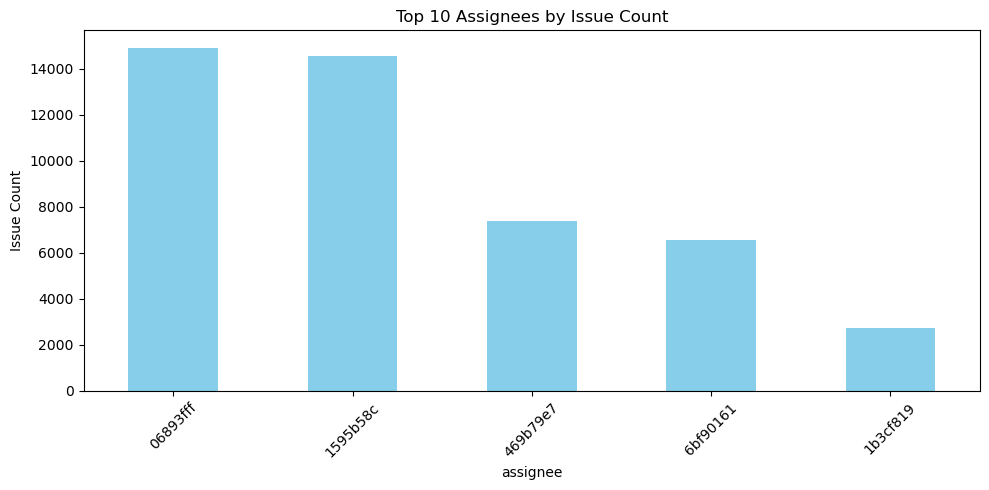

In [23]:
plt.figure(figsize=(10, 5))
assignee_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Assignees by Issue Count')
plt.ylabel('Issue Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('assignee_issue_count.png')  # 🔸 Save plot
plt.show()
